In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from category_encoders import TargetEncoder
from sklearn import preprocessing
from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import plotly.express as px

In [139]:
df = pd.read_csv("C:\\Users\\antho\\Documents\\Data Science\\Data\\hotel_bookings.csv")

In [140]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
28102,Resort Hotel,0,248,2016,September,37,10,4,6,2,...,No Deposit,147.0,NaN,0,Transient,8.0,0,0,Check-Out,2016-09-20
48960,City Hotel,1,72,2016,April,15,3,2,1,2,...,No Deposit,8.0,NaN,0,Transient,100.8,0,0,Canceled,2016-01-24
82202,City Hotel,0,12,2015,December,51,19,2,2,3,...,No Deposit,28.0,NaN,0,Transient,85.0,0,0,Check-Out,2015-12-23
34926,Resort Hotel,0,152,2017,April,14,5,0,4,2,...,No Deposit,NaN,223.0,0,Transient-Party,48.0,0,0,Check-Out,2017-04-09
9273,Resort Hotel,1,0,2016,November,46,7,1,0,1,...,No Deposit,NaN,NaN,0,Transient-Party,85.0,0,0,Canceled,2016-11-07


In [141]:
df.shape

(119390, 32)

In [142]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [143]:
# For the purposes of machine learning, I will only evaluate one hotel as a resort and a city hotel
# both have very different business problems/solutions.

city = df['hotel']=='City Hotel'
df = df[city]
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
95019,City Hotel,0,8,2016,August,33,11,0,2,2,...,No Deposit,9.0,NaN,0,Transient,139.0,0,2,Check-Out,2016-08-13
41127,City Hotel,0,2,2015,August,33,12,0,3,2,...,No Deposit,9.0,NaN,0,Contract,98.0,0,2,Check-Out,2015-08-15
89475,City Hotel,0,4,2016,May,21,21,0,1,2,...,No Deposit,138.0,NaN,0,Transient,107.0,0,0,Check-Out,2016-05-22
107927,City Hotel,0,56,2017,March,11,16,1,3,1,...,No Deposit,9.0,NaN,0,Transient,74.8,0,3,Check-Out,2017-03-20
42215,City Hotel,0,10,2015,September,36,3,0,1,2,...,No Deposit,9.0,NaN,0,Contract,155.0,0,1,Check-Out,2015-09-04


In [144]:
df['is_canceled'].value_counts()

0    46228
1    33102
Name: is_canceled, dtype: int64

# Data Cleaning

In [145]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                              24
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8131
company                           75641


In [146]:
df['children'].fillna(value=df['children'].mean(), inplace=True)

In [147]:
df['country'].fillna('N/A', inplace=True)

In [148]:
# Replace with N/A as most likely did not use agent to book.
df['agent'].fillna('N/A', inplace=True)

In [149]:
df.drop(columns=['company','agent'], inplace=True)
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
50091,City Hotel,1,100,2016,April,17,23,1,1,2,...,A,0,Non Refund,0,Transient,96.00,0,0,Canceled,2016-02-09
53315,City Hotel,1,16,2016,June,25,17,1,2,2,...,A,2,No Deposit,0,Transient,129.00,0,0,Canceled,2016-06-05
95172,City Hotel,0,56,2016,August,33,13,2,1,2,...,F,0,No Deposit,0,Transient,207.90,0,1,Check-Out,2016-08-16
91410,City Hotel,0,68,2016,June,25,18,2,1,2,...,A,0,No Deposit,0,Transient,80.75,0,0,Check-Out,2016-06-21
81330,City Hotel,0,3,2015,December,49,3,2,3,2,...,D,0,No Deposit,0,Transient,58.00,0,0,Check-Out,2015-12-08


In [150]:
# Sort months in chronological order
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months, ordered=True)
#df.sort_values(...)  # same as you have now; can use inplace=True

# EDA

In [151]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,3.226774,105.304465,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372167,0.084323,0.157983,0.415472,1.693411,0.608620,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


Text(0.5, 1, 'Correlation ')

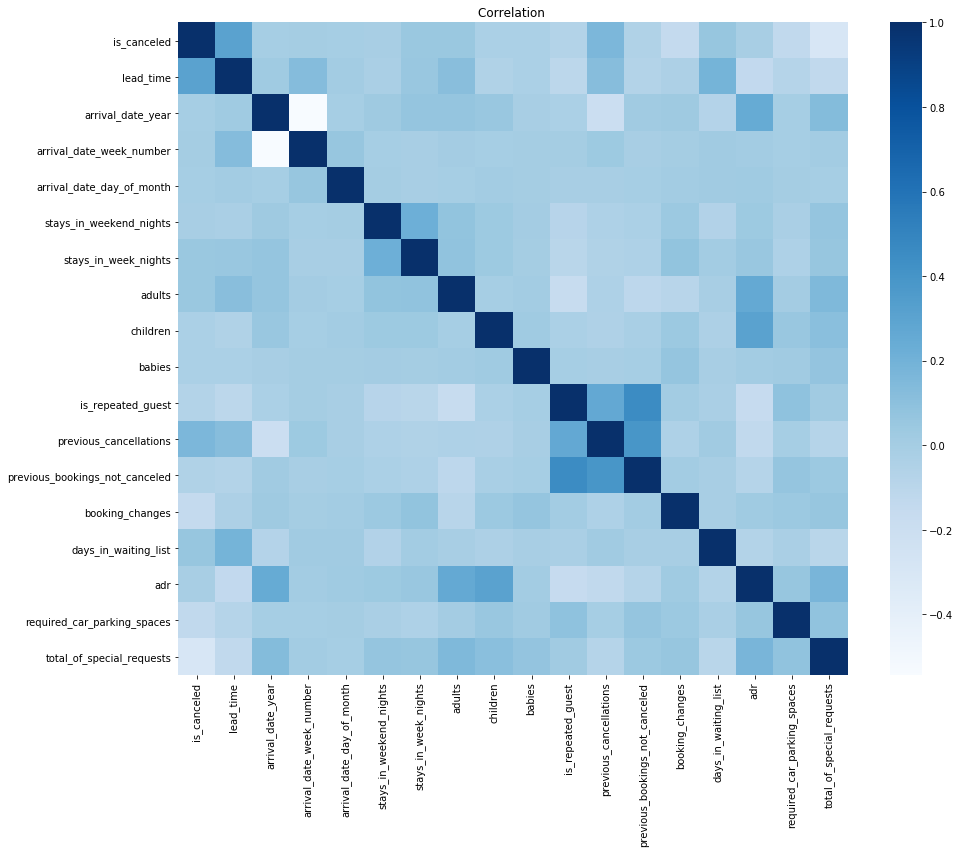

In [152]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Blues')
r.set_title("Correlation ")

In [153]:
corr.sort_values(by=["is_canceled"],ascending=False).iloc[0].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.309242
previous_cancellations            0.166643
days_in_waiting_list              0.060965
adults                            0.053054
stays_in_week_nights              0.048704
arrival_date_week_number          0.001580
arrival_date_year                -0.003004
arrival_date_day_of_month        -0.004331
stays_in_weekend_nights          -0.007343
adr                              -0.011965
children                         -0.027074
babies                           -0.030186
previous_bookings_not_canceled   -0.053134
is_repeated_guest                -0.065840
required_car_parking_spaces      -0.133096
booking_changes                  -0.149500
total_of_special_requests        -0.293889
Name: is_canceled, dtype: float64

# Target: Cancellations

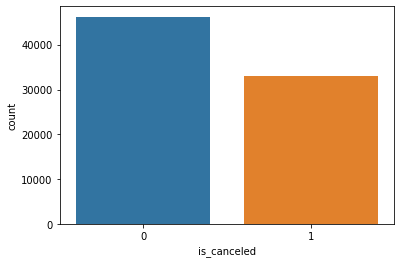

In [154]:
sns.countplot(x='is_canceled', data=df)
plt.show()
# 0 = Not cancelled, 1 = Cancelled

# Bookings Per Month

In [155]:
df['arrival_date_month'].value_counts().sort_index()

January      3736
February     4965
March        6458
April        7480
May          8232
June         7894
July         8088
August       8983
September    7400
October      7605
November     4357
December     4132
Name: arrival_date_month, dtype: int64

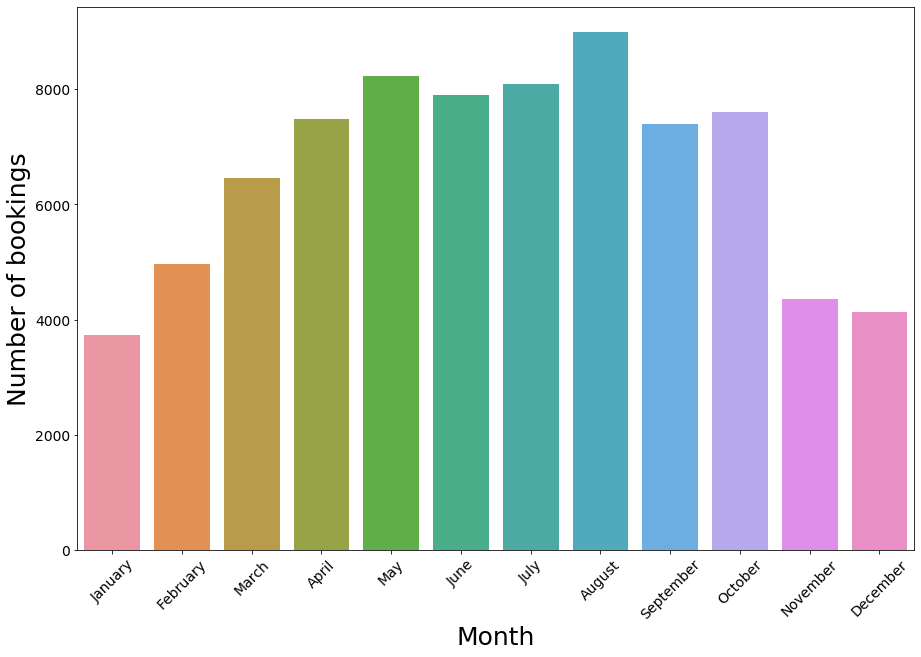

In [156]:
plt.figure(figsize=(15, 10))
sns.countplot(x='arrival_date_month', data=df)
#plt.title('Cancellations per month', fontsize=50)
plt.ylabel('Number of bookings', fontsize=25)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=25)
plt.xticks(rotation=45, fontsize=14)
plt.show()

In [157]:
month_count = df.groupby('arrival_date_month').count()['hotel']

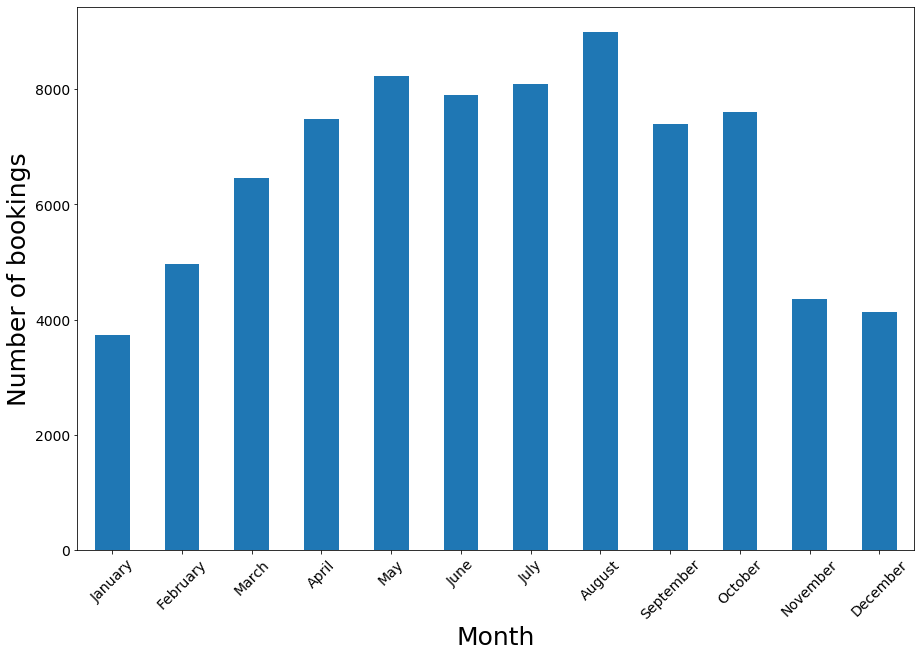

In [158]:
month_count.plot(kind='bar', figsize=(15,10))
#plt.title('Bookings per month', fontsize=50)
plt.ylabel('Number of bookings', fontsize=25)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=25)
plt.xticks(rotation=45, fontsize=14)
plt.show()

# Average Rate

In [159]:
df.groupby(['arrival_date_month'])['adr'].mean()

arrival_date_month
January       82.628986
February      85.088278
March         92.643116
April        111.251838
May          121.638560
June         119.074341
July         110.734292
August       114.680455
September    110.004661
October       99.974498
November      88.069601
December      88.826307
Name: adr, dtype: float64

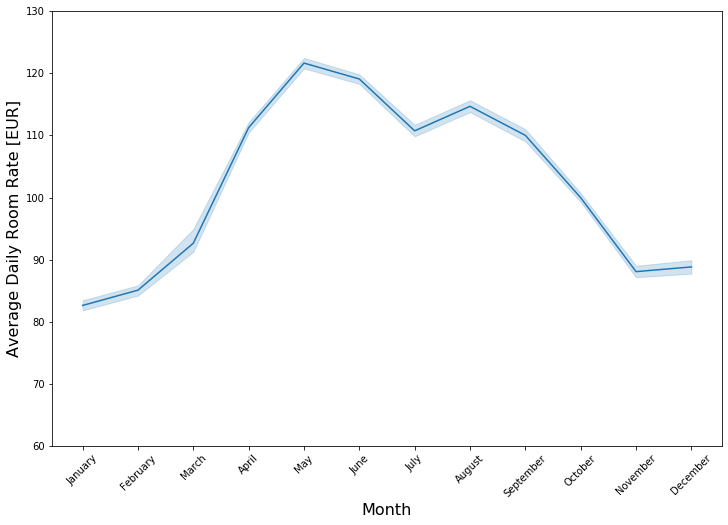

In [160]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", data=df)
#plt.title("Average Rate", fontsize=36)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Average Daily Room Rate [EUR]", fontsize=16)
plt.ylim(60, 130)
plt.show()

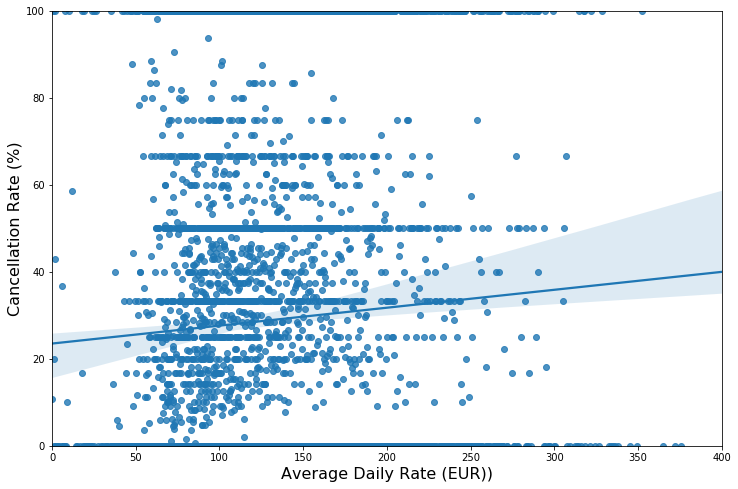

In [161]:
adr_cancel_data = df.groupby("adr")["is_canceled"].describe()

plt.figure(figsize=(12, 8))
sns.regplot(x=adr_cancel_data.index, y=adr_cancel_data["mean"].values * 100)
plt.xlabel("Average Daily Rate (EUR))", fontsize=16)
plt.ylabel("Cancellation Rate (%)", fontsize=16)
plt.xlim(0,400)
plt.ylim(0,100)
plt.show()

# Market Segment and Distribution Channel

In [162]:
df.distribution_channel.value_counts()

TA/TO        68945
Direct        6780
Corporate     3408
GDS            193
Undefined        4
Name: distribution_channel, dtype: int64

In [163]:
channel=df['distribution_channel'].value_counts()

# pie plot
fig = px.pie(channel,
             values=channel.values,
             names=channel.index,
             title="Bookings per distribution channel",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [164]:
segments=df['market_segment'].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [165]:
df.market_segment.value_counts()

Online TA        38748
Offline TA/TO    16747
Groups           13975
Direct            6093
Corporate         2986
Complementary      542
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

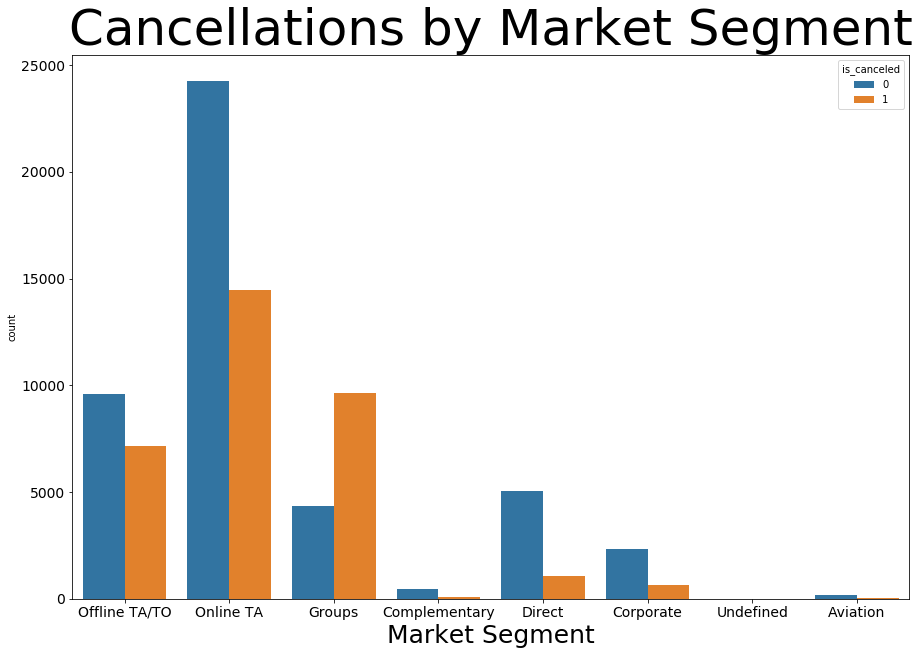

In [166]:
plt.figure(figsize=(15, 10))
sns.countplot(x='market_segment', hue='is_canceled', data=df)
#for index, value in enumerate(accuracy):
#    plt.text(index, value, str(value), fontsize=24)
plt.title('Cancellations by Market Segment', fontsize=50)
#plt.ylabel('Number of bookings', fontsize=25)
plt.yticks(fontsize=14)
plt.xlabel('Market Segment', fontsize=25)
plt.xticks(fontsize=14)
plt.show()
# 0 = Not cancelled, 1 = Cancelled

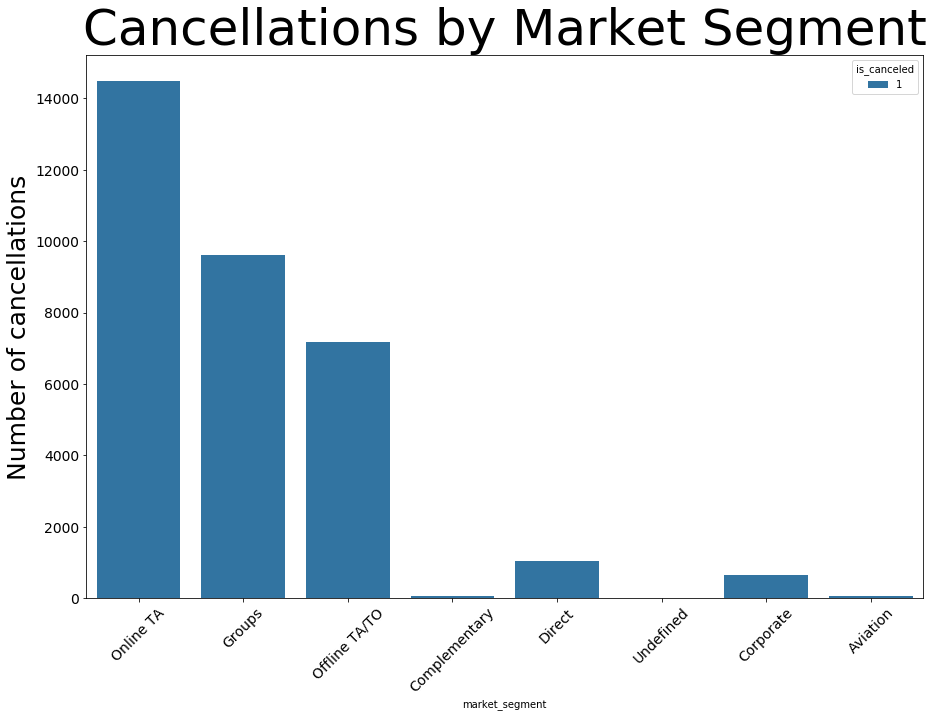

In [167]:
df_cxl = df.query('is_canceled == 1')
plt.figure(figsize=(15, 10))
sns.countplot(x='market_segment', hue='is_canceled', data=df_cxl)
plt.title('Cancellations by Market Segment', fontsize=50)
plt.ylabel('Number of cancellations', fontsize=25)
plt.yticks(fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.show()

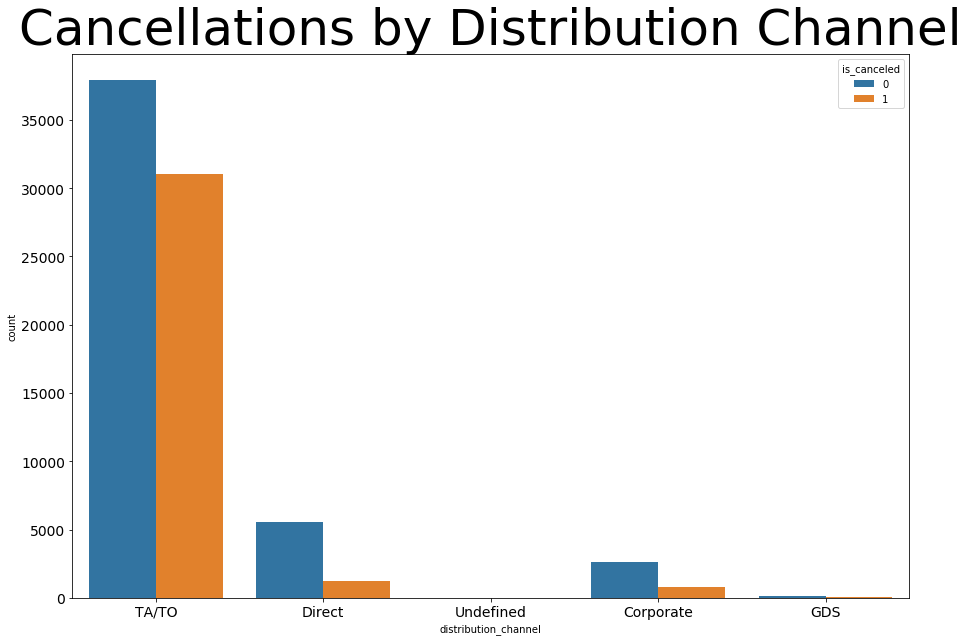

In [168]:
plt.figure(figsize=(15, 10))
sns.countplot(x='distribution_channel', hue='is_canceled', data=df)
plt.title('Cancellations by Distribution Channel', fontsize=50)
#plt.ylabel('Number of bookings', fontsize=25)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()
# 0 = Not cancelled, 1 = Cancelled

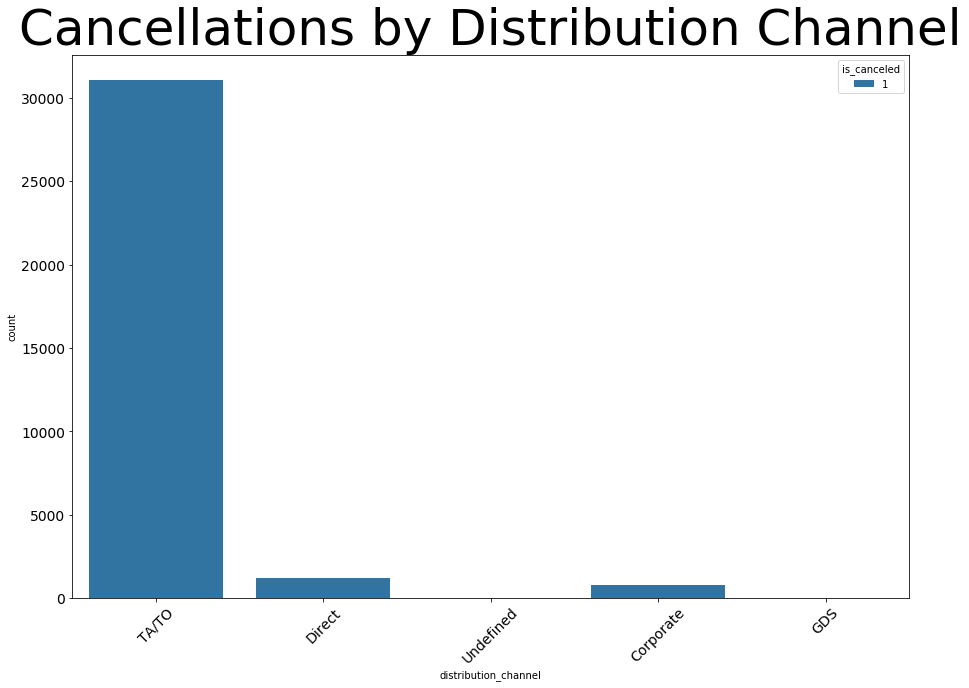

In [169]:
df_cxl = df.query('is_canceled == 1')
plt.figure(figsize=(15, 10))
sns.countplot(x='distribution_channel', hue='is_canceled', data=df_cxl)
plt.title('Cancellations by Distribution Channel', fontsize=50)
plt.yticks(fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.show()

In [170]:
cxls = df.loc[df['is_canceled'] == 1]
dist_cxl = cxls['distribution_channel'].value_counts()
dist_cxl

TA/TO        31043
Direct        1232
Corporate      786
GDS             37
Undefined        4
Name: distribution_channel, dtype: int64

In [171]:
channel=df['distribution_channel'].value_counts()

# pie plot
fig = px.pie(dist_cxl,
             values=dist_cxl.values,
             names=dist_cxl.index,
             title="Cancellations per distribution channel",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

# Special Requests

In [172]:
cxls = df.loc[df['is_canceled'] == 1]
request_cxl = cxls['total_of_special_requests'].value_counts()
request_cxl

0    26340
1     4721
2     1739
3      280
4       21
5        1
Name: total_of_special_requests, dtype: int64

In [173]:
request=df['total_of_special_requests'].value_counts()

# pie plot
fig = px.pie(request_cxl,
             values=request_cxl.values,
             names=request_cxl.index,
             title="Cancellations per number of requests",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [174]:
stay = df.loc[df['is_canceled'] == 0]
request_stay = stay['total_of_special_requests'].value_counts()
request_stay

0    21617
1    16699
2     6403
3     1307
4      177
5       25
Name: total_of_special_requests, dtype: int64

# Lead Time

In [175]:
df.groupby(['lead_time', 'is_canceled']).size()

lead_time  is_canceled
0          0              2836
           1               273
1          0              1632
           1               233
2          0              1003
                          ... 
608        1                17
615        1                17
622        1                17
626        1                30
629        1                17
Length: 836, dtype: int64

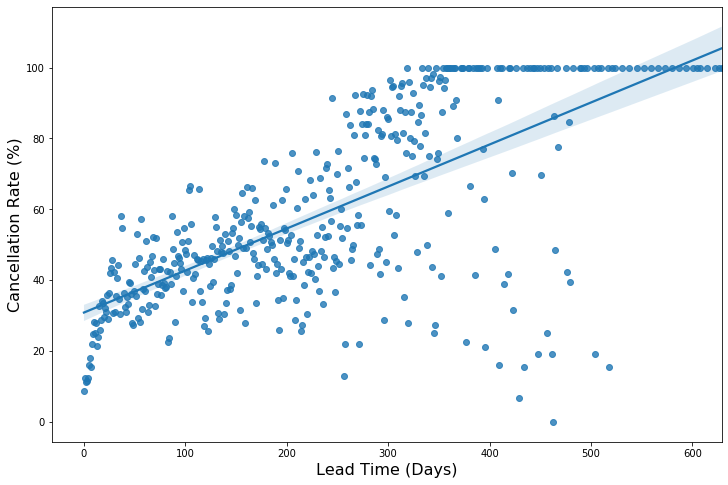

In [176]:
# group data for lead_time:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data.index, y=lead_cancel_data["mean"].values * 100)
plt.xlabel("Lead Time (Days)", fontsize=16)
plt.ylabel("Cancellation Rate (%)", fontsize=16)
# plt.xlim(0,365)
plt.show()

# Country

In [177]:
country_count = df['country'].value_counts()
country_count

PRT    30960
FRA     8804
DEU     6084
GBR     5315
ESP     4611
       ...  
GUY        1
NIC        1
PYF        1
SLE        1
SYC        1
Name: country, Length: 167, dtype: int64

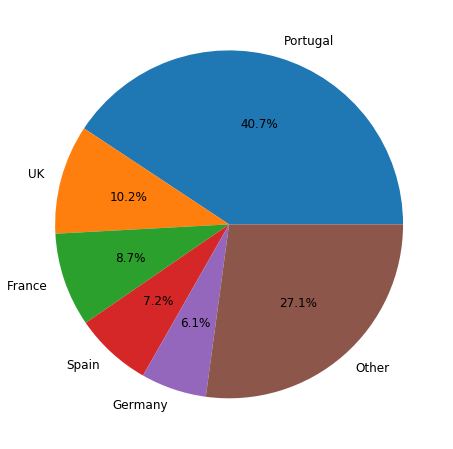

In [178]:
countries = 'Portugal', 'UK', 'France', 'Spain', 'Germany', 'Other'
countries_no = [48590, 12129, 10415, 8568, 7287, 32401]
plt.figure(figsize=(12, 8))
plt.pie(countries_no, labels=countries, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.show()
#Total = 119390

# Cancellations Per Month

In [179]:
cxl_percentage = df['is_canceled'].value_counts(normalize=True)*100
cxl_percentage

0    58.273037
1    41.726963
Name: is_canceled, dtype: float64

In [180]:
df.groupby(['arrival_date_month', 'is_canceled']).size() 

arrival_date_month  is_canceled
January             0              2254
                    1              1482
February            0              3064
                    1              1901
March               0              4072
                    1              2386
April               0              4015
                    1              3465
May                 0              4579
                    1              3653
June                0              4366
                    1              3528
July                0              4782
                    1              3306
August              0              5381
                    1              3602
September           0              4290
                    1              3110
October             0              4337
                    1              3268
November            0              2696
                    1              1661
December            0              2392
                    1              1740
dtype: i

In [181]:
df.groupby('arrival_date_month')['is_canceled'].value_counts(normalize=True)*100

arrival_date_month  is_canceled
January             0              60.331906
                    1              39.668094
February            0              61.711984
                    1              38.288016
March               0              63.053577
                    1              36.946423
April               0              53.676471
                    1              46.323529
May                 0              55.624393
                    1              44.375607
June                0              55.307829
                    1              44.692171
July                0              59.124629
                    1              40.875371
August              0              59.902037
                    1              40.097963
September           0              57.972973
                    1              42.027027
October             0              57.028271
                    1              42.971729
November            0              61.877439
                    1  

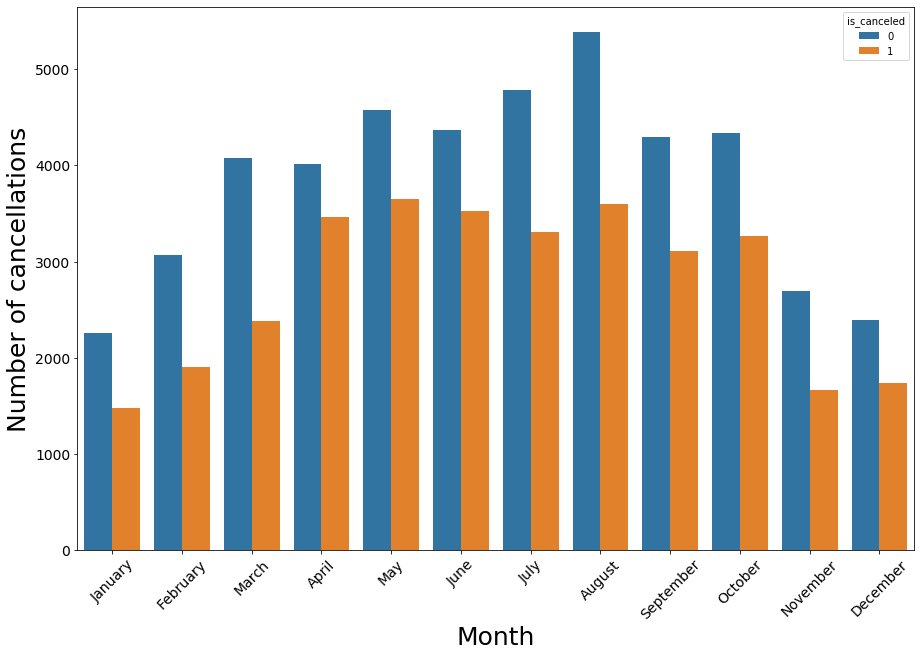

In [182]:
df_cxl = df.query('is_canceled == 1')
plt.figure(figsize=(15, 10))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=df)
#plt.title('Cancellations per month', fontsize=50)
plt.ylabel('Number of cancellations', fontsize=25)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=25)
plt.xticks(rotation=45, fontsize=14)
plt.show()

In [183]:
# df.loc[:, [df['is_canceled'] == 1]]
cxls = df.loc[df['is_canceled'] == 1]
cxls['arrival_date_month'].value_counts().sort_index()

January      1482
February     1901
March        2386
April        3465
May          3653
June         3528
July         3306
August       3602
September    3110
October      3268
November     1661
December     1740
Name: arrival_date_month, dtype: int64

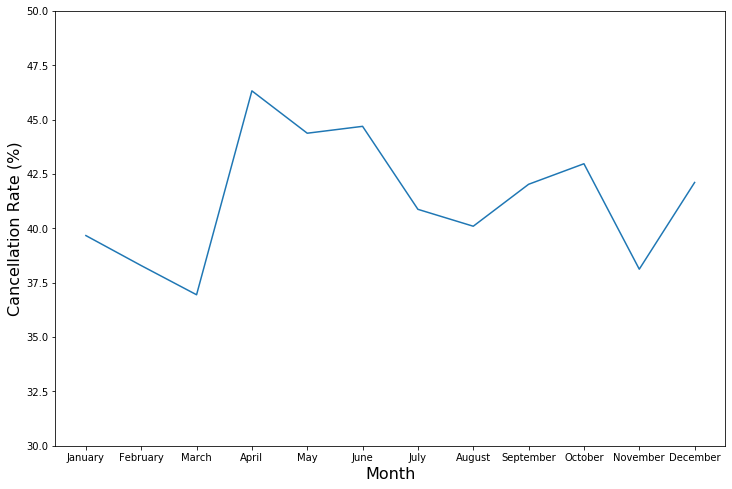

In [184]:
month_cancel_data = df.groupby("arrival_date_month")["is_canceled"].describe()

plt.figure(figsize=(12, 8))
sns.lineplot(x=month_cancel_data.index, y=month_cancel_data["mean"].values * 100)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Cancellation Rate (%)", fontsize=16)
plt.ylim(30, 50)
plt.show()

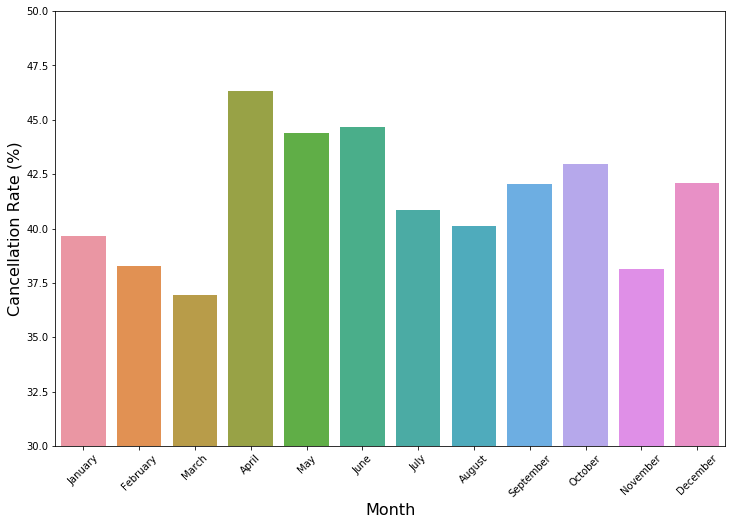

In [185]:
month_cancel_data = df.groupby("arrival_date_month")["is_canceled"].describe()

plt.figure(figsize=(12, 8))
sns.barplot(x=month_cancel_data.index, y=month_cancel_data["mean"].values * 100)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancellation Rate (%)", fontsize=16)
plt.ylim(30, 50)
plt.show()

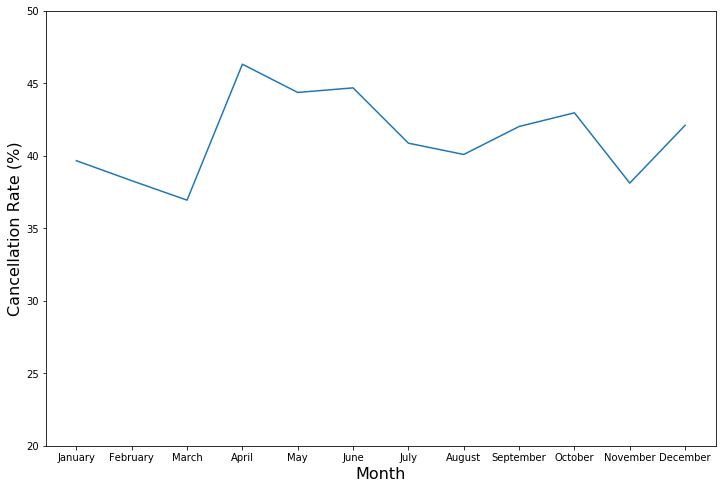

In [186]:
# Train model

# Make predictions on test data

# Add predictions to dataframe

# Groupby month and calculate mean

# Plot mean

# group data for lead_time:
month_cancel_data = df.groupby("arrival_date_month")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
#lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x=month_cancel_data.index, y=month_cancel_data["mean"].values * 100)
#plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Cancellation Rate (%)", fontsize=16)
plt.ylim(20, 50)
plt.show()

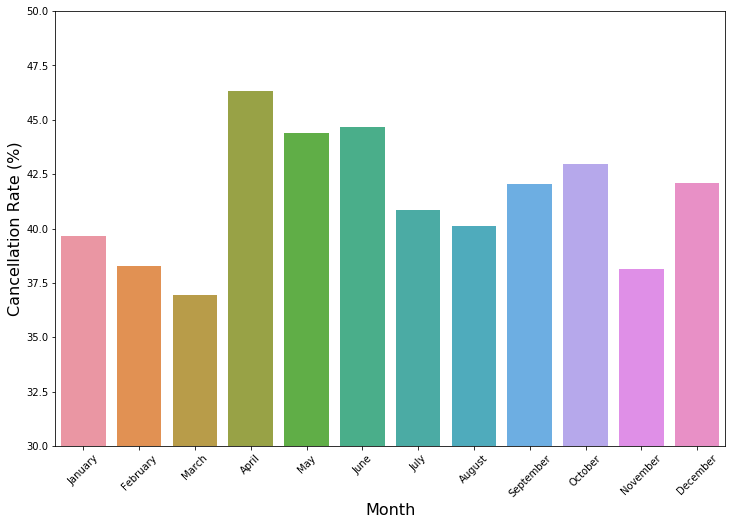

In [187]:
# group data for lead_time:
month_cancel_data = df.groupby("arrival_date_month")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
#lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=month_cancel_data.index, y=month_cancel_data["mean"].values * 100)
#plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancellation Rate (%)", fontsize=16)
plt.ylim(30, 50)
plt.show()

# Encode categorical data

In [188]:
df.dtypes

hotel                               object
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                           float64
babies                               int64
meal                                object
country                             object
market_segment                      object
distribution_channel                object
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                  object
assigned_room_type                  object
booking_changes                      int64
deposit_type                        object
days_in_wai

In [189]:
df['market_segment'] = pd.get_dummies(df['market_segment'])

In [190]:
df['distribution_channel'] = pd.get_dummies(df['distribution_channel'])

In [191]:
df['reserved_room_type'] = pd.get_dummies(df['reserved_room_type'])

In [192]:
df['deposit_type'] = pd.get_dummies(df['deposit_type'])

In [193]:
df['customer_type'] = pd.get_dummies(df['customer_type'])

In [194]:
label = preprocessing.LabelEncoder()
df['arrival_date_month'] = label.fit_transform(df['arrival_date_month'])

# Select model features

In [195]:
# Drop below features due to leakage/overfitting or irrelevant to classification model

X = df.drop(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_day_of_month', 'meal', 'country',
             'assigned_room_type', 'booking_changes', 'days_in_waiting_list', 'reservation_status',
             'reservation_status_date'], axis=1)
features = X.columns
y = df['is_canceled']

In [196]:
X = preprocessing.scale(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Logistic Regression

In [198]:
# Build Model
logreg = LogisticRegression()

# Fit Model
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7710828186058237


In [199]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion}")

# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[8850  312]
 [3320 3384]]

Normalized confusion matrix:
[0.9659463 0.0340537]
[0.49522673 0.50477327]


              precision    recall  f1-score   support

           0       0.73      0.97      0.83      9162
           1       0.92      0.50      0.65      6704

    accuracy                           0.77     15866
   macro avg       0.82      0.74      0.74     15866
weighted avg       0.81      0.77      0.75     15866



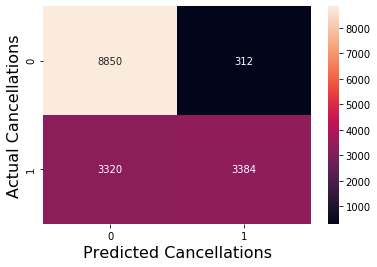

In [200]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
plt.ylabel('Actual Cancellations', fontsize=16)
plt.xlabel('Predicted Cancellations', fontsize=16)
print(classification_report(y_test, y_pred))

# Decision Tree

In [201]:
# Build Model
dt = DecisionTreeClassifier(random_state=1)

# Fit Model
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8094037564603555


Text(0.5, 0, 'Relative Importance')

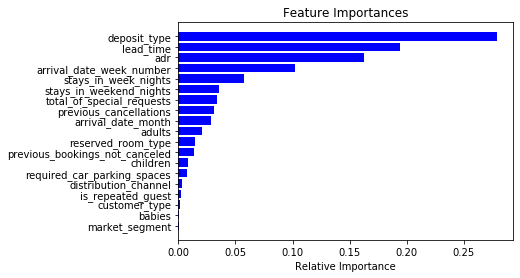

In [202]:
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [203]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion}")

# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[7607 1555]
 [1469 5235]]

Normalized confusion matrix:
[0.83027723 0.16972277]
[0.21912291 0.78087709]


              precision    recall  f1-score   support

           0       0.84      0.83      0.83      9162
           1       0.77      0.78      0.78      6704

    accuracy                           0.81     15866
   macro avg       0.80      0.81      0.81     15866
weighted avg       0.81      0.81      0.81     15866



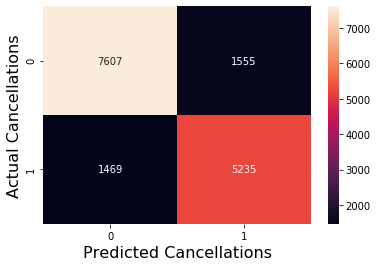

In [204]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
plt.ylabel('Actual Cancellations', fontsize=16)
plt.xlabel('Predicted Cancellations', fontsize=16
print(classification_report(y_test, y_pred))

# Random Forest

In [207]:
# Build Model
forest = RandomForestClassifier(n_estimators=100, max_depth=None)

# Fit Model
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8479137778898274


Text(0.5, 0, 'Relative Importance')

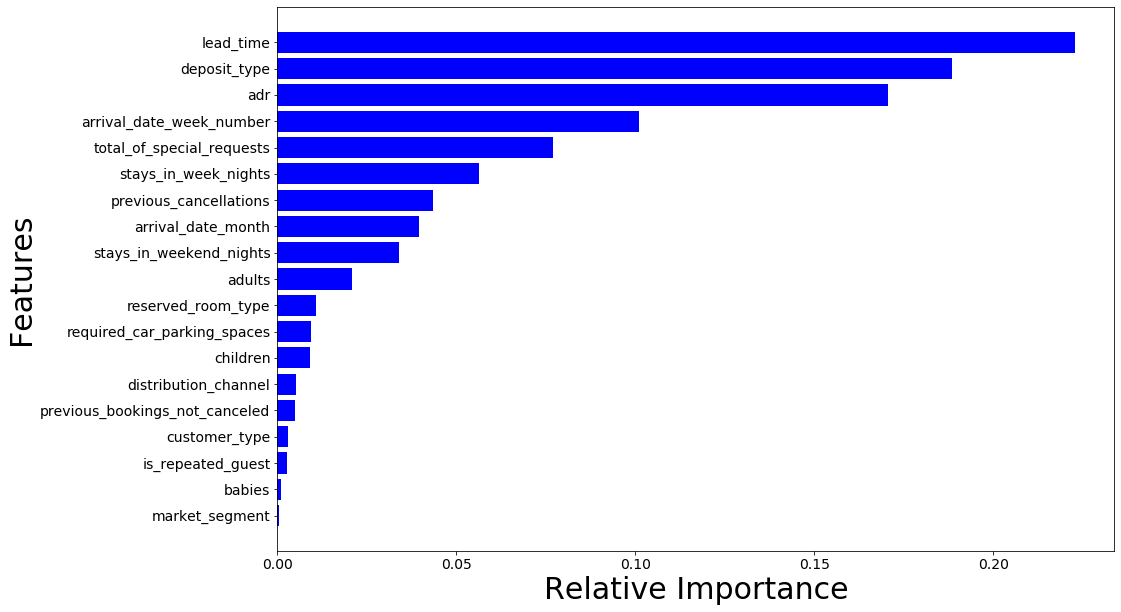

In [208]:
importances = forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.ylabel('Features', fontsize=30)
plt.yticks(range(len(indices)), features[indices], fontsize=14)
plt.xlabel('Relative importance to price range', fontsize=30)
plt.xticks(fontsize=14)
plt.xlabel('Relative Importance')

In [209]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion}")

# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[8318  844]
 [1569 5135]]

Normalized confusion matrix:
[0.90788038 0.09211962]
[0.23403938 0.76596062]


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      9162
           1       0.86      0.77      0.81      6704

    accuracy                           0.85     15866
   macro avg       0.85      0.84      0.84     15866
weighted avg       0.85      0.85      0.85     15866



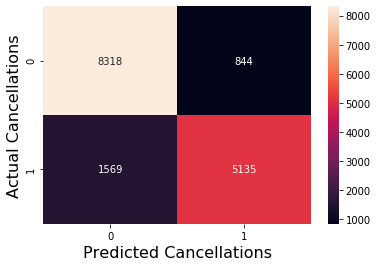

In [210]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
plt.ylabel('Actual Cancellations', fontsize=16)
plt.xlabel('Predicted Cancellations', fontsize=16)
print(classification_report(y_test, y_pred))

In [211]:
X_temp = df.drop(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_day_of_month', 'meal', 'country',
             'assigned_room_type', 'booking_changes', 'days_in_waiting_list', 'reservation_status',
             'reservation_status_date'], axis=1)

y_temp = df['is_canceled']

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size = 0.2, random_state=1)

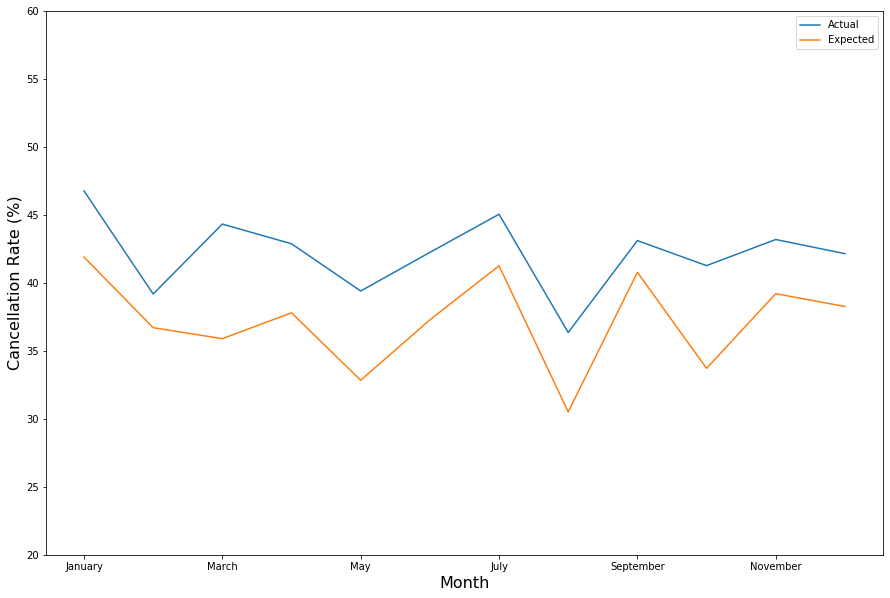

In [212]:
# Make predictions on test data
y_pred = forest.predict(X_test)

# Add predictions to dataframe
act_exp_df = pd.DataFrame({"Actual":y_test, "Expected":y_pred, 'arrival_date_month':X_test_temp['arrival_date_month']})

# Groupby month and calculate mean
month_cancel_data = act_exp_df.groupby("arrival_date_month").mean() * 100
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

month_cancel_data.index = months

fig, ax = plt.subplots(figsize=(15,10))

month_cancel_data.plot(ax=ax)
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Cancellation Rate (%)", fontsize=16)
ax.set_ylim(20, 60)
plt.show()

# AdaBoost

In [213]:
# Build Model
ada = AdaBoostClassifier()

# Fit Model
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7836883902684987


In [214]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion}")

# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[8622  540]
 [2892 3812]]

Normalized confusion matrix:
[0.9410609 0.0589391]
[0.43138425 0.56861575]


              precision    recall  f1-score   support

           0       0.75      0.94      0.83      9162
           1       0.88      0.57      0.69      6704

    accuracy                           0.78     15866
   macro avg       0.81      0.75      0.76     15866
weighted avg       0.80      0.78      0.77     15866



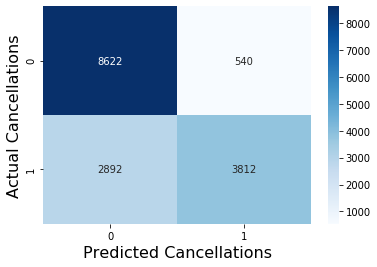

In [215]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = "Blues", annot=True,fmt="d");
plt.ylabel('Actual Cancellations', fontsize=16)
plt.xlabel('Predicted Cancellations', fontsize=16)
print(classification_report(y_test, y_pred))

# XG Boost

In [216]:
# Build Model
xgb = XGBClassifier(max_depth=6)

# Fit Model
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.825475860330266


In [217]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion}")

# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[8390  772]
 [1997 4707]]

Normalized confusion matrix:
[0.91573892 0.08426108]
[0.29788186 0.70211814]


              precision    recall  f1-score   support

           0       0.81      0.92      0.86      9162
           1       0.86      0.70      0.77      6704

    accuracy                           0.83     15866
   macro avg       0.83      0.81      0.82     15866
weighted avg       0.83      0.83      0.82     15866



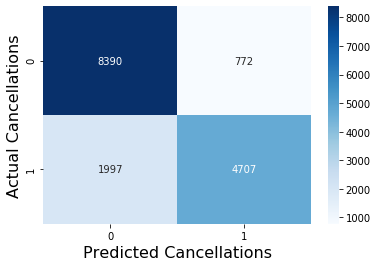

In [218]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = "Blues", annot=True,fmt="d");
plt.ylabel('Actual Cancellations', fontsize=16)
plt.xlabel('Predicted Cancellations', fontsize=16)
print(classification_report(y_test, y_pred))